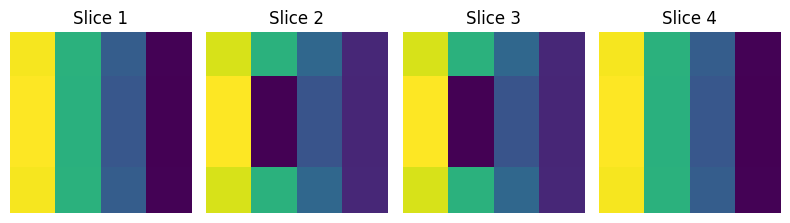

[[-5.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[1.0 ,-4.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[0.0 ,1.0 ,-4.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[0.0 ,0.0 ,1.0 ,-5.0 ,0.

In [8]:
%run linear_matrix_template_generator.ipynb

In [9]:
#condensed_b
sparse_array = {
    "val": val_array,
    "col_idx": col_idx_array,
    "row_ptr": row_ptr_array,
}

In [10]:
X0 = np.linspace(0, 1, num=condensed_b.size, dtype=np.float32)

In [11]:
def calc_residuals(sparse_array, condensed_b, X):
    def row_indexes_iterator():
        for start, stop in zip(sparse_array["row_ptr"][:-1], sparse_array["row_ptr"][1:]):
            yield start, stop
        else:
            yield sparse_array["row_ptr"][-1], sparse_array["val"].size

    residuals = np.zeros(sparse_array["row_ptr"].size, dtype=np.float32)
    for row, (start, stop) in enumerate(row_indexes_iterator()):
        residual = np.float32(0)
        for index in range(start, stop):
            val = sparse_array["val"][index]
            column = sparse_array["col_idx"][index]
            x_val = X[column]
            residual += val * x_val
        residual -= condensed_b[row]
        residuals[row] = residual
    #print(residuals)
    #print((residuals**2).sum())
    return residuals

calc_residuals(sparse_array, condensed_b, X0)


array([ 2.35593224e+00,  3.38983059e-01,  3.38983029e-01,  2.20339000e-01,
        2.15254235e+00, -1.67638063e-08,  3.38983089e-01,  0.00000000e+00,
        2.00000000e+00,  2.98023224e-08,  3.16384107e-01, -1.52542353e-01,
        1.77966106e+00,  1.69491500e-01,  1.69491544e-01, -3.55932236e-01,
        1.50847459e+00, -3.38983163e-02,  3.38983387e-02, -6.44067883e-01,
        1.27118635e+00,  1.92090377e-01, -7.85310745e-01,  1.20338988e+00,
        1.69491753e-01, -8.53107512e-01,  1.08474576e+00, -1.49011612e-08,
       -9.03955325e-02, -1.06779647e+00,  1.06779647e+00,  1.19209290e-07,
        6.77965358e-02, -1.08474588e+00,  8.30508530e-01, -7.90960193e-02,
       -1.22598863e+00,  7.62711883e-01, -1.01695046e-01, -1.29378521e+00,
        6.44067645e-01,  3.38984132e-02, -5.64972758e-02, -1.50847483e+00,
        3.55932236e-01, -1.69491649e-01, -1.69491410e-01, -1.77966106e+00,
        1.52542531e-01,  0.00000000e+00, -3.38983297e-01, -1.99999988e+00,
       -1.19209290e-07,  

In [12]:
X0 = np.linspace(0, 1, num=condensed_b.size, dtype=np.float32)
for i in range(200):
    residuals = calc_residuals(sparse_array, condensed_b, X0)
    X0 -= residuals/10
print((residuals**2).sum())

inf


C:\Users\Rafael\AppData\Local\Temp\ipykernel_5516\4099190374.py:17: RuntimeWarning: overflow encountered in cast
  residuals[row] = residual


In [13]:
def ravel_results(volume, X):
    output = np.zeros(volume.shape, dtype=np.float32)
    i = 0
    w, h, d = volume.shape
    for x, y, z in ((a,b,c) for a in range(w) for b in range(h) for c in range(d)):
        coords = np.array((x, y, z))
        center_c = volume[tuple(coords)]
    
        if center_c == 0:
            continue
        else:
            output[tuple(coords)] = -X[i]
            i += 1

    return output

output = ravel_results(volume, X0)
            

In [14]:
output

array([[[-inf,  inf, -inf,  inf],
        [ inf, -inf,  inf, -inf],
        [-inf,  inf, -inf,  inf],
        [ inf, -inf,  inf, -inf]],

       [[ inf, -inf,  inf, -inf],
        [-inf,   0., -inf,  inf],
        [ inf,   0.,  inf, -inf],
        [-inf,  inf, -inf,  inf]],

       [[-inf,  inf, -inf,  inf],
        [ inf,   0.,  inf, -inf],
        [-inf,   0., -inf,  inf],
        [ inf, -inf,  inf, -inf]],

       [[ inf, -inf,  inf, -inf],
        [-inf,  inf, -inf,  inf],
        [ inf, -inf,  inf, -inf],
        [-inf,  inf, -inf,  inf]]], dtype=float32)

In [15]:
pressure_field

array([[[0.8736755 , 0.60226804, 0.33525455, 0.10896964],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8736755 , 0.60226804, 0.33525455, 0.10896964]],

       [[0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682]],

       [[0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682]],

       [[0.8736755 , 0.60226804, 0.33525455, 0.10896964],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8736755 , 0.60226804, 0.33525455, 0.10896964]]], dtype=float32)